# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Longitud de curvas.


### Ejercicio 23.- Calcular la longitud de la cicloide utilizando el método de Simpson con $n = 5$ parábolas. Estudia el error cometido.
### $
\left\{\begin{array}{llll} 
x &=& a(t-\sin(t))\\
y &=& a(1-\cos(t)) 
\end{array} \right ., a=2, \, t\in [0,2\pi]
$. 

SOLUCIÓN

Comenzamos usando la sentencia "parametric_plot" para visualizar el movimiento de la cicloide. Para usar $t$ como variable es necesario introducirla antes en el sage.

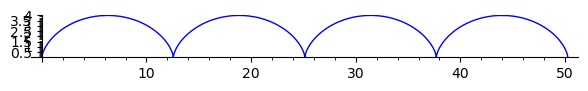

In [8]:
t=var('t')
parametric_plot((2*(t-sin(t)),2*(1-cos(t))),(t,0,8*pi)) 

La longitud que nos piden está para valores de $t$ en $[0,2\pi]$.

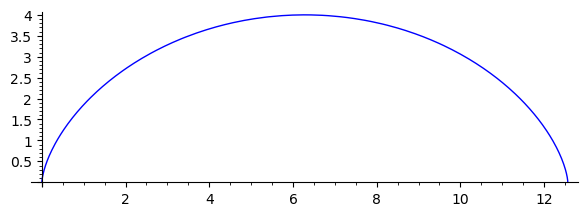

In [9]:
parametric_plot((2*(t-sin(t)),2*(1-cos(t))),(t,0,2*pi)) 

Recordad que la longitud de una curva plana dada en paramétricas es: 
$$L  = \int_{0}^{2\pi}\sqrt{x'(t)^2+y'(t)^2}dt,$$
por lo que definimos la función que hay que integrar así:

Como nuestra curva es

$
\left\{\begin{array}{llll} 
x(t) &=& a(t-\sin(t))\\
y(t) &=& a(1-\cos(t)) 
\end{array} \right  ., a=2, \, t\in [0,2\pi]
$. 

Calculamos sus derivadas:


$
\left\{\begin{array}{llll} 
x'(t) &=& a(1-\cos(t))\\
y'(t) &=& a(\sin(t)) 
\end{array} \right ., a=2, \, t\in [0,2\pi]
$. 

Luego la función que necesitamos integrar es:

$$f(t)=\sqrt{x'(t)^2+y'(t)^2}=\sqrt{a^2(1-\cos(t))^2+a^2\sin^2(t)}=$$
$$a\sqrt{1+\cos^2(t)-2\cos(t)+\sin^2(t)}=a\sqrt{2-2\cos(t)}$$

En concreto, para el caso $a=2$,

$$f(t)=2\sqrt{2-2\cos(t)}=\sqrt{8-8\cos(t)}.$$

Otra forma de calcular y llegar a la misma expresión es la siguiente:

In [10]:
x(t)=2*(t-sin(t))
y(t)=2*(1-cos(t))
f(t)=sqrt((expand(diff(x(t),t)^2+diff(y(t),t)^2 )).simplify_trig()) 
show(f)

t |--> sqrt(-8*cos(t) + 8)

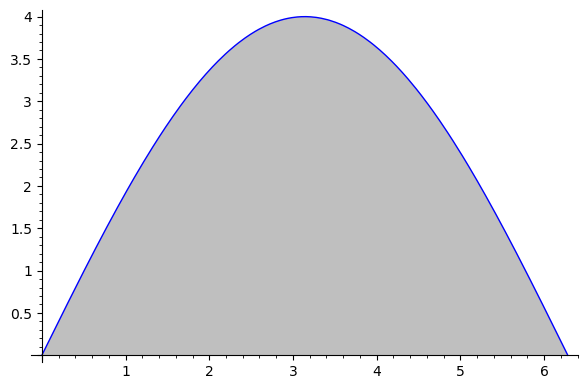

In [11]:
plot(f,0,2*pi,fill=True)

In [12]:
a=0 #definimos el intervalo
b=2*pi

Calculemos la integral con SAGE, observamos que se produce una anomalía si tratamos de calcular la integral directamente y no con "numerical_integral".

In [13]:
numerical_integral(f,a,b)[0]

15.999999999999998

In [14]:
show(integral(f,t, 0,pi).n())
show(integral(f,t,  pi,2*pi).n())
show(integral(f,t, 0,2*pi).n()) #misterio

8.00000000000000

8.00000000000000

0.000000000000000

 Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_a^b f(t) \, dt \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$

In [15]:
n=5
X=[a+k*(b-a)/(2*n) for k in [0..2*n]] 
#definimos los nodos. Recordad que n=5 es el número de parábolas.
show(X)

[0, 1/5*pi, 2/5*pi, 3/5*pi, 4/5*pi, pi, 6/5*pi, 7/5*pi, 8/5*pi, 9/5*pi, 2*pi]

In [16]:
simpson=(b-a)/(6*n)*(f(a)+4*sum(f(X[2*k-1]) for k in range(1,n+1))+2*sum(f(X[2*k]) for k in range(1,n))+f(b))
numerical_approx(simpson)

16.0008761385200

Estudiemos el error. Sabemos que la cota de error viene dada por:
 $$ \left|\int_a^b f(t) \, dt-{\rm Simpson}_{\bf n}(f)\right|   \leq  \frac{(b-a)M}{180} \cdot {h^4}, h=\dfrac{b-a}{2n} $$ 
 o bien
 $$  \left|\int_a^b f(t) \, dt-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \dfrac{(b-a)^5}{180\cdot  (2\cdot n)^4}\cdot M  $$ 

siendo $M>0$ una constante tal que $|f^{(4)}(t)|\leq M$ para todo $x\in [a,b]$. Busquemos $M$:

In [17]:
show(f(t))
show([t, a, b])

sqrt(-8*cos(t) + 8)

[t, 0, 2*pi]

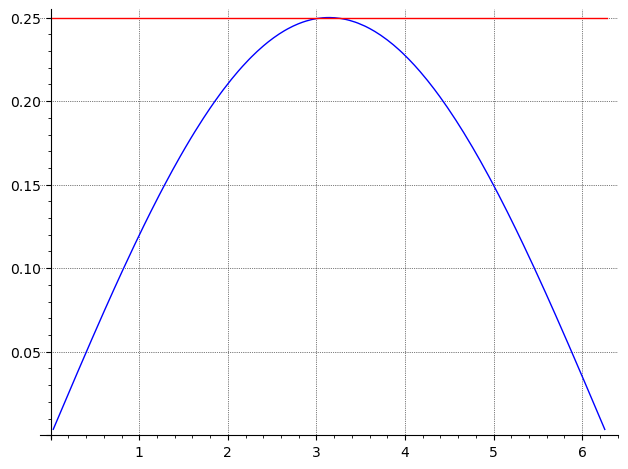

In [10]:
plot(abs(derivative(f(t),t,4)),(t,a,b),gridlines=True)+plot(0.25,a,b,color='red')

In [11]:
M=0.25;
cota=M*(b-a)^5/(180*(2*n)^4);
numerical_approx(cota)

0.00136008748793458

La diferencia entre la aproximación a través del Método de Simpson y el valor real de la integral que sabemos que es exactamente $16$ es el siguiente, que es menor que la cota.

In [12]:
abs(simpson-16).n()

0.000876138520034431

Nota: Observemos que en general podemos calcular la longitud de la cicloide realizando la integral a mano de la siguiente forma:

$$L  = \int_{0}^{2\pi}\sqrt{x'(t)^2+y'(t)^2}dt=\int_{0}^{2\pi}a\cdot \sqrt{2-2\cos(t)}dt=2\int_{0}^{\pi}a\cdot\sqrt{2-2\cos(t)}dt=$$

$$=a\cdot 2\sqrt{2}\int_{0}^{\pi}\sqrt{1-\cos(t)}dt=a\cdot 2\sqrt{2}\int_{0}^{\pi}\sqrt{1-\cos(t)}\frac{\sqrt{1+\cos(t)}}{\sqrt{1+\cos(t)}}dt=$$

$$=a\cdot 2\sqrt{2}\int_{0}^{\pi}\frac{\sqrt{1-\cos^2(t)}}{\sqrt{1+\cos(t)}}dt= a\cdot 2\sqrt{2}\int_{0}^{\pi}\frac{\sqrt{\sin^2(t)}}{\sqrt{1+\cos(t)}}dt=a\cdot 2\sqrt{2}\int_{0}^{\pi}\frac{\sin(t)}{\sqrt{1+\cos(t)}}dt$$

Haciendo el cambio de variable:
$$x=1+cos(t) \rightarrow dx=-sin(t)dt$$

$$ L=a\cdot 2\sqrt{2}\int_{1+\cos0}^{1+\cos\pi}\frac{-1}{\sqrt{x}}dx=a\cdot 2\sqrt{2}\int_{2}^{0}\frac{-2}{2\sqrt{x}}dx= $$

$$ =a\cdot 4\sqrt{2}\int_{0}^{2}\frac{1}{2\sqrt{x}}dx=a\cdot 4\sqrt{2}\sqrt{x}|_{0}^{2}=a\cdot 4\sqrt{2}(\sqrt{2}-\sqrt{0})=8a$$
Por tanto, para $a=2$ se tiene que $L=16$.